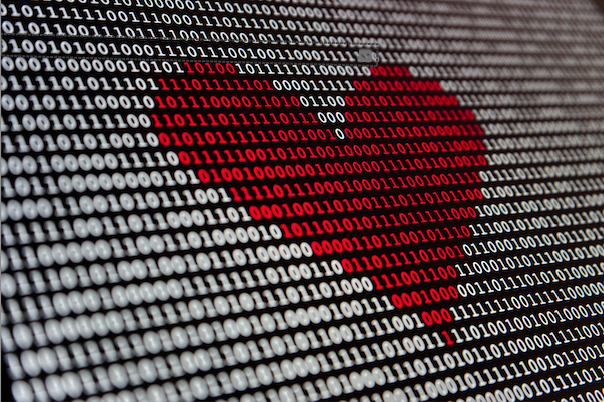



#**Heart Disease in the United States***

* Heart disease is the leading cause of death for men, women, and people of most racial and ethnic groups in the United States.

* One person dies every 34 seconds in the United States from cardiovascular disease.

* About 697,000 people in the United States died from heart disease in 2020—that’s 1 in every 5 deaths.

* Heart disease cost the United States about $229 billion each year from 2017 to 2018. This includes the cost of health care services, medicines, and lost productivity due to death.


Machine learning can be used to identify a person's risk for cardiovascular disease and aid in early treatment / prevention.

**Source: cdc.gov*

#Attribute Information
Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: Heart Disease, 0: Normal]

#Source

This dataset was created by combining different datasets already available independently, but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations

Hungarian: 294 observations

Switzerland: 123 observations

Long Beach VA: 200 observations

Stalog (Heart) Data Set: 270 observations

Total: 1190 observations

Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

#Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.

University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.

University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.

V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 2.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, roc_curve, RocCurveDisplay, roc_auc_score, accuracy_score, ConfusionMatrixDisplay

In [ ]:
# filepath = "/Users/maiya/Downloads"
# heart = pd.read_csv(filepath+"/heart.csv")
heart = pd.read_csv('heart.csv')

In [ ]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
heart.shape

(918, 12)

In [ ]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

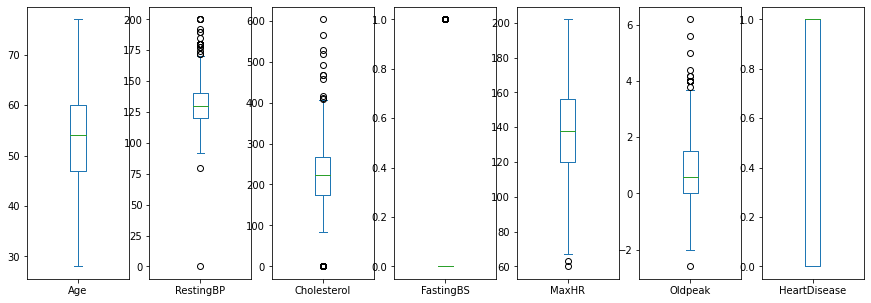

In [ ]:
heart.select_dtypes('number').plot(kind='box', subplots=True, figsize=(15,5));

In [ ]:
heart['RestingBP'].sort_values(ascending=True)

449      0
314     80
227     92
692     94
832     94
      ... 
759    192
399    200
732    200
241    200
365    200
Name: RestingBP, Length: 918, dtype: int64

In [ ]:
heart['Cholesterol'].sort_values().value_counts()

0      172
254     11
223     10
220     10
211      9
      ... 
117      1
123      1
131      1
293      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

We can see values equal to zero in columns RestingBP and Cholesterol.  Because those values appear to be standing in for a missing value, we will impute them.

In [ ]:
heart['RestingBP'] = np.clip(heart['RestingBP'], a_min=80, a_max=200)
heart['Cholesterol'] = np.clip(heart['Cholesterol'], a_min = 90, a_max = 600)

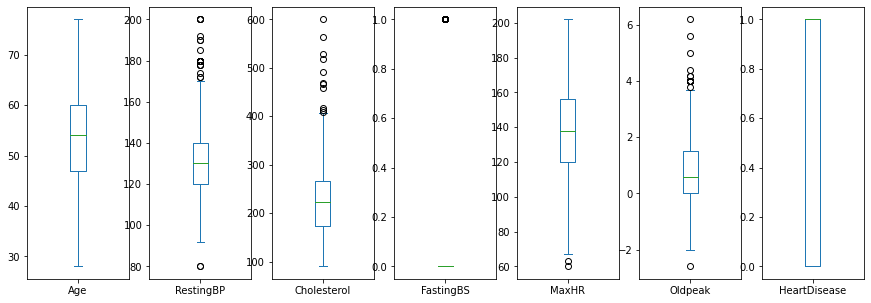

In [ ]:
heart.select_dtypes('number').plot(kind='box', subplots=True, figsize=(15,5));

In [ ]:
target = 'HeartDisease'
X = heart.drop(target, axis=1)
y = heart[target]

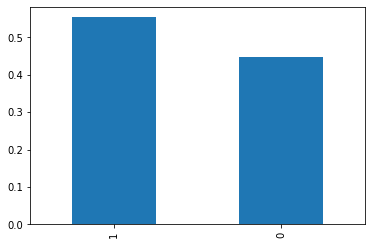

In [ ]:
y.value_counts(normalize=True).plot(kind='bar');

In [ ]:
baseline_acc = y.value_counts(normalize = True).max()
print(baseline_acc)

0.5533769063180828


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
model = make_pipeline(
        OrdinalEncoder(),
        RandomForestClassifier(n_jobs=-1, random_state=42))

In [ ]:
model.fit(X_train, y_train);

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_test, y_test)

0.875

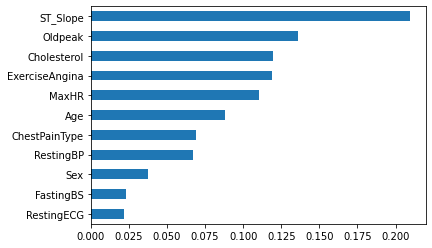

In [ ]:
feature_imp = model.named_steps.randomforestclassifier.feature_importances_
features = model.named_steps.randomforestclassifier.feature_names_in_
features_df = pd.Series(data=feature_imp, index=features).sort_values(ascending=True)
features_df.plot(kind='barh');

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        77
           1       0.89      0.90      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



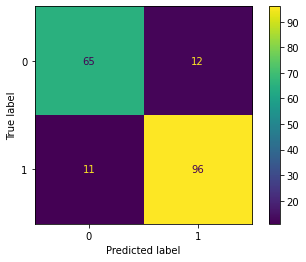

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    model, 
    X_test, 
    y_test
    );

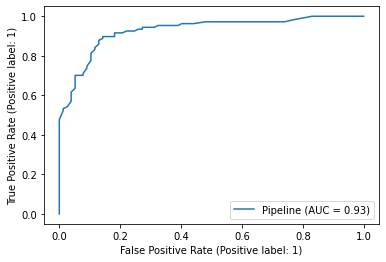

In [ ]:
RocCurveDisplay.from_estimator(
    model, 
    X_test, 
    y_test
    );

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:, -1]

In [ ]:
roc_auc_score(y_test, y_pred_prob)

0.9280859327588299

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [ ]:
data = {
    'false_pos_rate' : fpr,
    'true_pos_rate' : tpr,
    'thresholds' : thresholds
}

In [ ]:
pd.DataFrame(data).head(60)

,false_pos_rate,true_pos_rate,thresholds
0,0.000000,0.000000,2.00
1,0.000000,0.009346,1.00
2,0.000000,0.018692,0.99
3,0.000000,0.065421,0.98
4,0.000000,0.093458,0.97
5,0.000000,0.149533,0.96
6,0.000000,0.177570,0.95
7,0.000000,0.186916,0.94
8,0.000000,0.224299,0.93
9,0.000000,0.252336,0.92


In [ ]:
y_pred_prob[y_pred_prob>= 0.60] = 1
y_pred_prob[y_pred_prob < 0.60] = 0

In [ ]:
accuracy_score(y_test, y_pred_prob)

0.8532608695652174

In [ ]:
model.score(X_test, y_pred_prob)

0.9456521739130435

In [ ]:
roc_auc_score(y_test, y_pred_prob)

0.8574462920257312

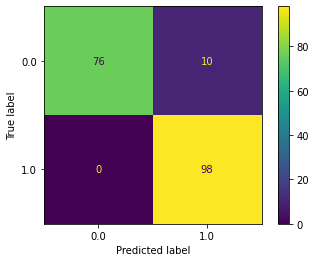

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    model, 
    X_test, 
    y_pred_prob
    );

In [ ]:
print(classification_report(y_test, y_pred_prob))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        77
           1       0.91      0.83      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        77
           1       0.89      0.90      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

